FROM KAGGLE: https://www.kaggle.com/dfs/nasa/meteorite-landings

"About df

The Meteoritical Society collects data on meteorites that have fallen to Earth from outer space. This df includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet.

Notes on missing or incorrect data points:

- a few entries here contain date information that was incorrectly parsed into the NASA database. As a spot check: any date that is before 860 CE or after 2016 are incorrect; these should actually be BCE years. There may be other errors and we are looking for a way to identify them.
- a few entries have latitude and longitude of 0N/0E (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 0N/0E locations should probably be treated as NA.

The Data
Note that a few column names start with "rec" (e.g., recclass, reclat, reclon). These are the recommended values of these variables, according to The Meteoritical Society. In some cases, there were historical reclassification of a meteorite, or small changes in the data on where it was recovered; this df gives the currently recommended values.

The df contains the following variables:

- name: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
- id: a unique identifier for the meteorite
- nametype: one of:
    - valid: a typical meteorite
    - relict: a meteorite that has been highly degraded by weather on Earth
- recclass: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
- mass: the mass of the meteorite, in grams
- fall: whether the meteorite was seen falling, or was discovered after its impact; one of:
    - Fell: the meteorite's fall was observed
    - Found: the meteorite's fall was not observed
- year: the year the meteorite fell, or the year it was found (depending on the value of fell)
- reclat: the latitude of the meteorite's landing
- reclong: the longitude of the meteorite's landing
- GeoLocation: a parentheses-enclose, comma-separated tuple that combines reclat and reclong"

In [24]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
df = pd.DataFrame(pd.read_csv("Meteorite_Landings.csv"))

In [3]:
df.describe()

id      mass (g)          year        reclat       reclong
count  45716.000000  4.558500e+04  45425.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.828817    -39.122580     61.074319
std    16860.683030  5.749889e+05     25.052766     46.378511     80.647298
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330

In [4]:
df.head()

name     id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1.0    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2.0    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6.0    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10.0    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370.0    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [5]:
df.isnull().sum()

name              0
id                1
nametype          1
recclass          1
mass (g)        132
fall              1
year            292
reclat         7316
reclong        7316
GeoLocation    7316
dtype: int64

In [6]:
df = df.dropna()
df.shape

(38115, 10)

Because of the restrictions described in the introduction:

In [7]:
df = df[(df.year >= 860) & (df.year <= 2016)]
df = df[((df.reclong <= 180) & (df.reclong >= -180)) & ((df.reclat != 0) | (df.reclong != 0))]

In [8]:
df.rename(columns={"name": "Name", "id": "Id", "nametype": "Name_type", 
                        "recclass": "Class", "mass (g)": "Mass", "fall": "Fall",
                        "year": "Year", "reclat": "Latitude", 
                        "reclong": "Longitude", "GeoLocation": "Geo_Location"}, inplace=True)

In [9]:
df.Latitude = df.Latitude.round(2)
df.Longitude = df.Longitude.round(2)
df.Geo_Location = list(zip(df.Latitude, df.Longitude))

In [10]:
df.head(10)

Name     Id Name_type        Class      Mass  Fall    Year  \
0               Aachen    1.0     Valid           L5      21.0  Fell  1880.0   
1               Aarhus    2.0     Valid           H6     720.0  Fell  1951.0   
2                 Abee    6.0     Valid          EH4  107000.0  Fell  1952.0   
3             Acapulco   10.0     Valid  Acapulcoite    1914.0  Fell  1976.0   
4              Achiras  370.0     Valid           L6     780.0  Fell  1902.0   
5             Adhi Kot  379.0     Valid          EH4    4239.0  Fell  1919.0   
6  Adzhi-Bogdo (stone)  390.0     Valid        LL3-6     910.0  Fell  1949.0   
7                 Agen  392.0     Valid           H5   30000.0  Fell  1814.0   
8               Aguada  398.0     Valid           L6    1620.0  Fell  1930.0   
9        Aguila Blanca  417.0     Valid            L    1440.0  Fell  1920.0   

   Latitude  Longitude      Geo_Location  
0     50.78       6.08     (50.78, 6.08)  
1     56.18      10.23    (56.18, 10.23)  
2     54.22    -113.00   (54.22, -113.0)  
3     16.88     -99.90    (16.88, -99.9)  
4    -33.17     -64.95  (-33.17, -64.95)  
5     32.10      71.80      (32.1, 71.8)  
6     44.83      95.17    (44.83, 95.17)  
7     44.22       0.62     (44.22, 0.62)  
8    -31.60     -65.23   (-31.6, -65.23)  
9    -30.87     -64.55  (-30.87, -64.55)

Displaying the meteorite landings data on a world map.

In [11]:
import plotly.graph_objects as go
from plotly import offline

In [12]:
offline.init_notebook_mode(connected=True)

In [13]:
trace = go.Scattergeo(
    lon=df["Longitude"],
    lat=df["Latitude"],
    name="Meteorite Landings",
    mode="markers",
    marker=go.scattergeo.Marker(size=5, color="blue"),
    text=df["Name"]
)

In [14]:
layout = go.Layout(
    title="Meteorite Landings in the world",
    width=1600,
    height=1000,
    showlegend=True,
    geo=go.layout.Geo(
        showland=True,
        landcolor='lightgrey',
        showcountries=False,
    )
)

In [15]:
trace = [trace]

fig = go.Figure(data=trace, layout=layout)
offline.iplot(fig)

Text(0.5, 1.0, 'Distribution by "Fall" through time')

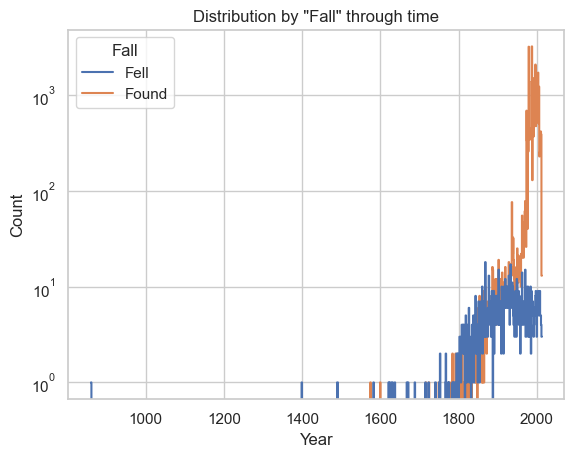

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x=df.Year, hue=df.Fall,
             log_scale=(False, True), element="step", fill=False)
plt.title('Distribution by "Fall" through time')

In [31]:
df[df.Year < 1000]

Name       Id Name_type Class   Mass  Fall   Year  Latitude  Longitude  \
704  Nogata  16988.0     Valid    L6  472.0  Fell  860.0     33.72     130.75   

        Geo_Location  
704  (33.72, 130.75)

<Axes: xlabel='Year', ylabel='Mass'>

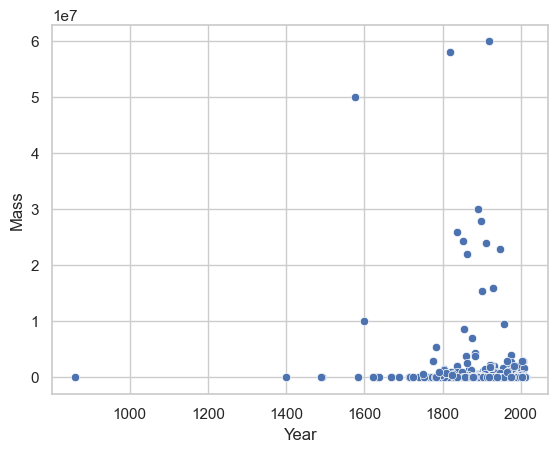

In [32]:
sns.scatterplot(data=df, x=df.Year, y=df.Mass)

Masses of meteorites are usually small so log scale is a more appropriate choice for visualizing their distribution:

/Users/Bartek/Desktop/Bartek/Programowanie/Python/Portfolio/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



<Axes: xlabel='Year', ylabel='Mass'>

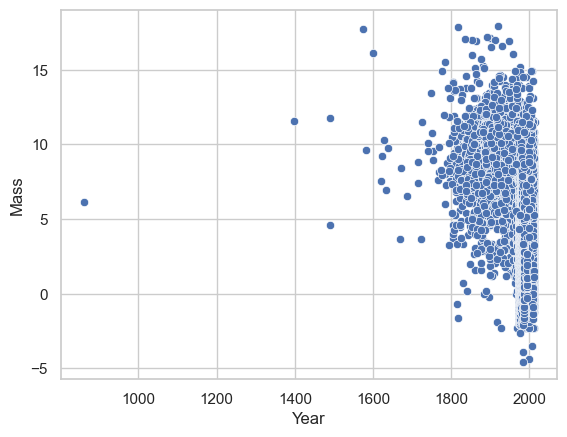

In [33]:
sns.scatterplot(data=df, x=df.Year, y=np.log(df.Mass))

In [66]:
import plotly.express as px
px.scatter_geo(data_frame = df, lat = "Latitude", lon = "Longitude", hover_name="Name", color="Year", size="Mass", title = 'Meteorite landings by Year and Mass')

/Users/Bartek/Desktop/Bartek/Programowanie/Python/Portfolio/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/Users/Bartek/Desktop/Bartek/Programowanie/Python/Portfolio/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



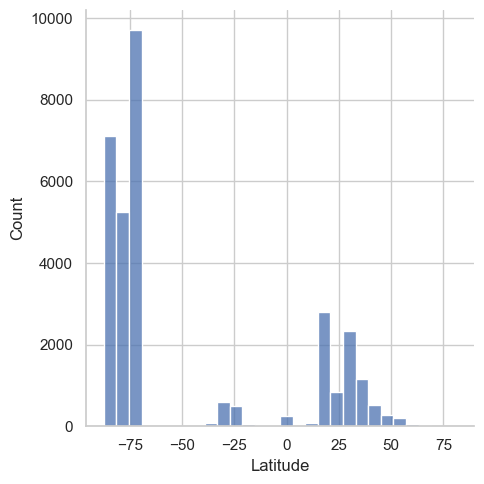

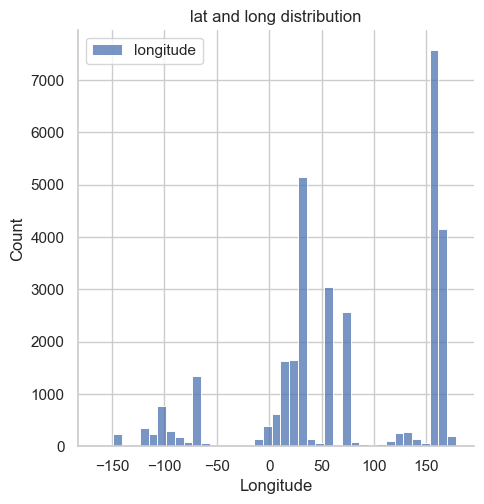

In [57]:
sns.displot(df.Latitude)
sns.displot(df.Longitude)
plt.title('lat and long distribution');
plt.legend(['longitude', 'latitude'])